# 分離ー適用ー結合
Pandasが得意としているのは、ある条件でデータを分類し、その特徴を調べるという処理です。具体的には、
1. DataFrame.groupbyメソッドで小さいDataFrameに分割
1. グループごとに計算を行う
1. それらを集めてグループごとの計算結果を表示する

という流れとなります。  
どういうgroupに分けるか、分けたDataFrameでどのような計算を行うかは解析の最も難しく面白いところだと思います。  
このあたりの手法は[Group By: split-apply-combine](http://pandas.pydata.org/pandas-docs/stable/groupby.html)を参考にしました。

## DataFrame.groupby
引数で与えた列をkeyとして、分割してDataFrameGroupByオブジェクトを返す関数です（**分割**）。

In [1]:
import pandas as pd

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({"key1": np.random.choice(list("abc"), 15),
                "value1": np.random.randn(15),
                "value2": np.random.rand(15)})
df

,key1,value1,value2
0,b,-0.229520,0.548244
1,b,1.152179,0.619107
2,b,1.352351,0.268501
3,c,-0.526751,0.639367
4,b,-0.495978,0.919488
5,c,0.640618,0.219935
6,c,-0.257896,0.250225
7,b,-1.654085,0.077116
8,c,-0.396103,0.839241
9,a,0.219484,0.428560


### DataFrameGroupByオブジェクト
イテレータであり、for ~ in ...の...に置くと、グループ名と分割されたDataFrameを取り出すことが出来ます。

In [3]:
for _name, _df in df.groupby("key1"):
    print(_name)
    print(_df)
    print()

a
   key1    value1    value2
9     a  0.219484  0.428560
11    a  0.934771  0.776174

b
   key1    value1    value2
0     b -0.229520  0.548244
1     b  1.152179  0.619107
2     b  1.352351  0.268501
4     b -0.495978  0.919488
7     b -1.654085  0.077116
12    b  1.647687  0.388953

c
   key1    value1    value2
3     c -0.526751  0.639367
5     c  0.640618  0.219935
6     c -0.257896  0.250225
8     c -0.396103  0.839241
10    c  0.393046  0.683116
13    c -1.077741  0.198676
14    c -0.242961  0.348742



In [4]:
# get_groupで特定のkeyを持つDataFrameを取得する
df.groupby("key1").get_group("a")

,key1,value1,value2
9,a,0.219484,0.428560
11,a,0.934771,0.776174


DataFrameGroupByオブジェクトのメソッドを呼び出すことで、分割された各DataFrameで計算されます（**適用**）。  
最終的に、グループごとに計算を行った結果がまとめられます（**結合**）。

In [5]:
# GroupByオブジェクトの関数を呼ぶとグループごとに計算した結果を返す
df.groupby("key1").mean()

,value1,value2
key1,,
a,0.577128,0.602367
b,0.295439,0.470235
c,-0.209684,0.454186


自作関数を各列に適用するためにはaggメソッドを使います。

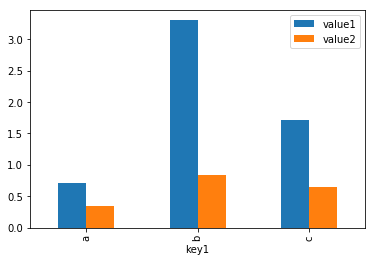

In [6]:
# 最大値と最小値の差を計算する自作関数
def func(cols):
    return cols.max() - cols.min()

# aggメソッドで各グループ、各列に関数を適用し、値を得る
df.groupby("key1").agg(func).plot.bar()

正規分布乱数の方が最大値と最小値の差が大きいことがわかりますね。  